<img src='https://drive.google.com/uc?id=1tqYIvII8lJ_FnqE6ugS21n4s93kMwTLy' />

## Machine Learning
## School of Computing and Engineering, University of West London
## Massoud Zolgharni

# Tutorial: Multi-Layer Perceptron (MLP)

A Note About The Data

The data for this seminar is famous. Called, the iris dataset, it contains four variables measuring various parts of iris flowers of three related species, and then a fourth variable with the species name. The reason it is so famous in machine learning and statistics communities is because the data requires very little preprocessing (i.e. no missing values, all features are floating numbers, etc.).
https://archive.ics.uci.edu/ml/datasets/Iris/


In [ ]:
# import iris data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

Split the data randomly into a training set and a test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

Show the number of observations for the test and training dataframes

In [ ]:
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))

Number of observations in the training data: 112
Number of observations in the test data: 38


In [ ]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
 X_test.shape, y_test.shape

((38, 4), (38,))

Create an MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4,4,2), max_iter = 10000, learning_rate = 'adaptive', random_state = 1)

Train the Classifier to take the training features and learn how they relate to the training y (the species)

In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4, 2), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Apply the Classifier we trained to the test data

In [ ]:
y_pred = mlp.predict(X_test)

Import scikit-learn metrics module for accuracy calculation

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on test set: %0.2f " % (accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 97.37 


In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred, target_names=class_names))

Look at the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]])

You can also create a function to nicely plot the confusion matrix.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title= 'Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Plot confusion matrix

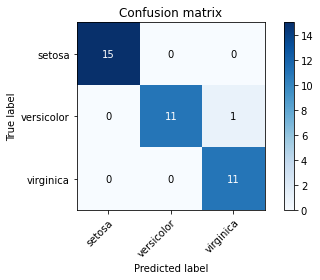

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes=class_names)
plt.show()

## Cross-validation: evaluating the model's performance

In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function. Let’s load the iris data set to fit a linear support vector machine on it:

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a **test set** X_test, y_test. Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.

<img src='https://drive.google.com/uc?id=1X6N02dg7aYmNel8mx0gMun-ylTwfMdpn' />

In scikit-learn a random split into training and test sets can be quickly computed with the **train_test_split** helper function, as we did above.

When evaluating different settings (“hyperparameters”) for model developments, such as the C setting that must be manually set for an SVM (do you rememeber from our previous lectures?), there is still a risk of overfitting on the test set because the parameters can be tweaked until the model performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalisation performance.

### Validation set
To solve this problem, yet another part of the dataset can be held out as a so-called **validation set**: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.





A solution to this problem is a procedure called **cross-validation** (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called **k-fold** CV, the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:


*   a model is trained using  of the folds as training data
*   the resulting model is validated on the remaining part of the data






The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data, which is a major advantage in problems such as inverse inference where the number of samples is very small.

<img src='https://drive.google.com/uc?id=1xD-aZSXJ7ZBzOZTOsvX9Nzo5UvLOM5ad' />

### Computing cross-validated metrics

The simplest way to use cross-validation is to call the cross_val_score helper function on the model and the dataset.

The following example demonstrates how to estimate the accuracy of a model on the iris dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X, y, cv=5)
print(scores)

[1.         0.96666667 0.93333333 0.93333333 1.        ]


The mean score and the confidence interval of the score estimate are given by:

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.06)
